In [32]:
import seaborn as sns
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker


# Załadowanie metryk

In [6]:
def load_json(path: str) -> dict:
    with open(path, 'rb') as f:
        obj = json.load(f)
    return obj

models = ['decision_tree', 'xgboost', 'log_reg_full', 'log_reg_rf_select']
metrics_list = [
    { 'name': model_name, 'metrics': load_json(f'../metrics/{model_name}.json') } 
    for model_name in models
]

In [7]:
from collections import defaultdict


def get_metrics_df(metrics_list: list[dict]) -> pd.DataFrame:
    data = defaultdict(list)
    for metrics in metrics_list:
        data['model'].append(metrics['name'])
        for metric_name in metrics['metrics']:
            data[metric_name].append(np.mean(metrics['metrics'][metric_name]))
        
    return pd.DataFrame(data)

metrics_df = get_metrics_df(metrics_list)

# Porównanie wartości dla różnych modeli

In [15]:
legend = {
    'decision_tree': 'Drzewo decyzyjne',
    'xgboost': 'XGBoost',
    'log_reg_full': 'Regresja Logistyczna',
    'log_reg_rf_select': 'Regresja Logistyczna z selekcją',
}

metrics_df = metrics_df.replace({ 'model': legend })
metrics_df

,model,accuracy,sensitivity,specificity,auc
0,Drzewo decyzyjne,0.953002,0.929638,0.959633,0.944636
1,XGBoost,0.998806,0.994863,0.999926,0.997394
2,Regresja Logistyczna,0.994897,0.981285,0.998760,0.990023
3,Regresja Logistyczna z selekcją,0.994889,0.981206,0.998772,0.989989


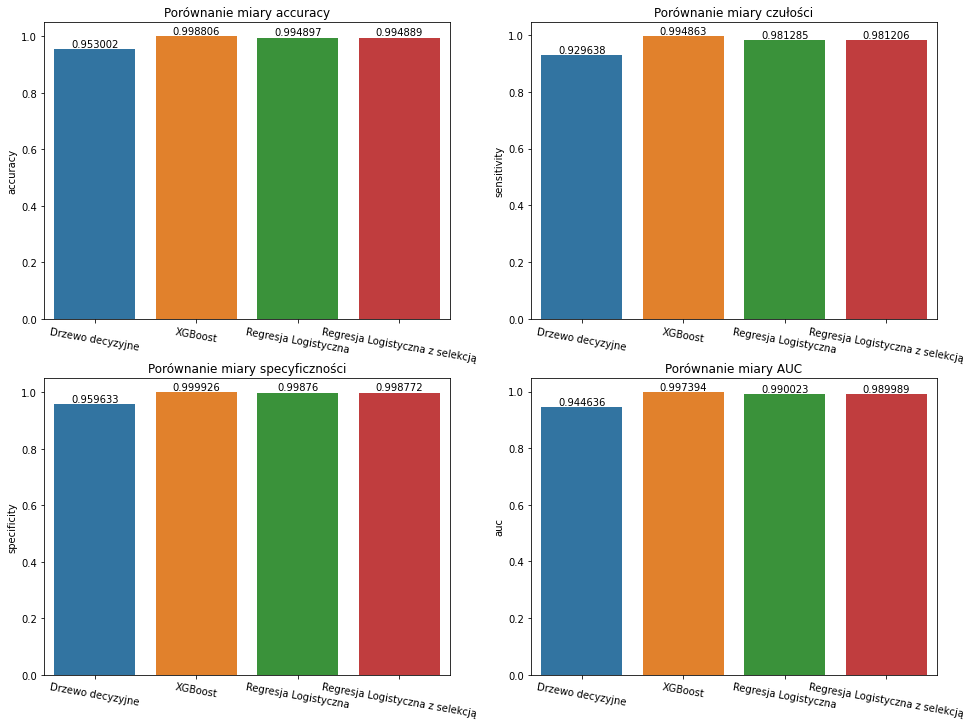

In [39]:
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

metric_names = ['accuracy', 'czułości', 'specyficzności', 'AUC']
axs = axs.flatten()

sns.barplot(data=metrics_df, x='model', y='accuracy', ax=axs[0])
axs[0].set_title(f'Porównanie miary accuracy')

sns.barplot(data=metrics_df, x='model', y='sensitivity', ax=axs[1])
axs[1].set_title(f'Porównanie miary czułości')

sns.barplot(data=metrics_df, x='model', y='specificity', ax=axs[2])
axs[2].set_title(f'Porównanie miary specyficzności')

sns.barplot(data=metrics_df, x='model', y='auc', ax=axs[3])
axs[3].set_title(f'Porównanie miary AUC')

for ax in axs:
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=-10)
    ax.set_xlabel('')


## Wizualizacja drzewa decyzyjnego

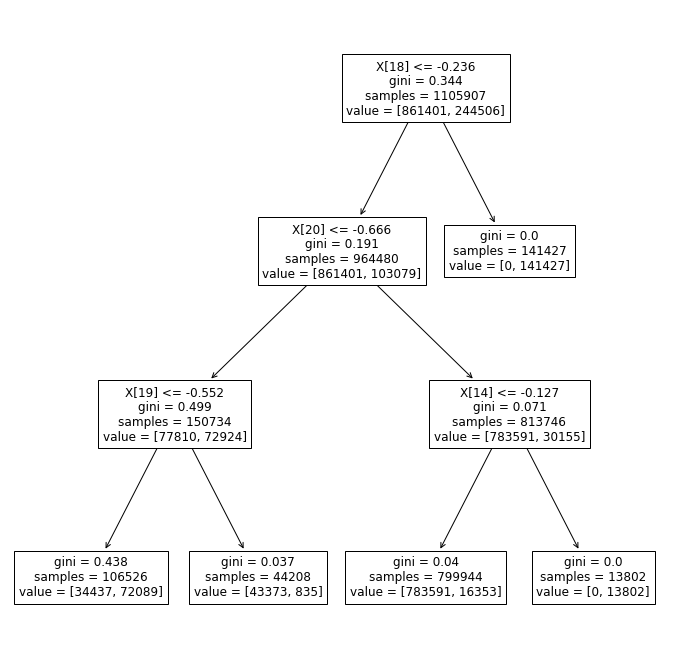

In [44]:
from sklearn import tree
import pickle

with open('../models/decision_tree/rs_1.pkl', 'rb') as f:
    clf = pickle.load(f)


_, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

_ = tree.plot_tree(clf, ax=ax)


In [50]:
with open('../models/columns_encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

encoder.get_feature_names_out()[[18, 20, 19, 14]]

array(['collection_recovery_fee', 'last_fico_range_high',
       'last_pymnt_amnt', 'out_prncp_inv'], dtype=object)